In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# in order to restrict gpu usage
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
train_dir = r'C:\Users\Saksham Sharma\Desktop\train'
test_dir = r'C:\Users\Saksham Sharma\Desktop\test'
validation_dir = r'C:\Users\Saksham Sharma\Desktop\validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#generating batches of tensor images data using data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale  = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 32,
                    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 32,
                        class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))   # it is done in order to avooid overfitting(in this it will randomly drop 50% neurons.
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ["acc"])

In [11]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,  # (number of images / batch size)
                             epochs = 100,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6926 - acc: 0.5177 - val_loss: 0.6808 - val_acc: 0.5577
Epoch 2/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6805 - acc: 0.5619 - val_loss: 0.6586 - val_acc: 0.5876
Epoch 3/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6692 - acc: 0.5893 - val_loss: 0.6467 - val_acc: 0.6269
Epoch 4/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6514 - acc: 0.6102 - val_loss: 0.6512 - val_acc: 0.6129
Epoch 5/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6307 - acc: 0.6420 - val_loss: 0.5986 - val_acc: 0.6808
Epoch 6/100
100/100 [==============================] - 23s 226ms/step - loss: 0.6164 - acc: 0.6492 - val_loss: 0.6270 - val_acc: 0.6364
Epoch 7/100
100/100 [==============================] - 21s 213ms/step - loss: 0.6109 - acc: 0.6708 - val_loss: 0.5992 - val_acc: 0.6631
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4141 - acc: 0.8122 - val_loss: 0.4465 - val_acc: 0.8065
Epoch 62/100
100/100 [==============================] - 22s 223ms/step - loss: 0.4091 - acc: 0.8112 - val_loss: 0.4307 - val_acc: 0.8128
Epoch 63/100
100/100 [==============================] - 21s 213ms/step - loss: 0.4034 - acc: 0.8185 - val_loss: 0.5238 - val_acc: 0.7703
Epoch 64/100
100/100 [==============================] - 21s 212ms/step - loss: 0.4086 - acc: 0.8116 - val_loss: 0.4388 - val_acc: 0.7900
Epoch 65/100
100/100 [==============================] - 21s 211ms/step - loss: 0.4039 - acc: 0.8157 - val_loss: 0.4375 - val_acc: 0.8160
Epoch 66/100
100/100 [==============================] - 21s 214ms/step - loss: 0.4022 - acc: 0.8178 - val_loss: 0.5396 - val_acc: 0.7684
Epoch 67/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4069 - acc: 0.8090 - val_loss: 0.4563 - val_acc: 0.7925
Epoch 68/100
100/100 [===================

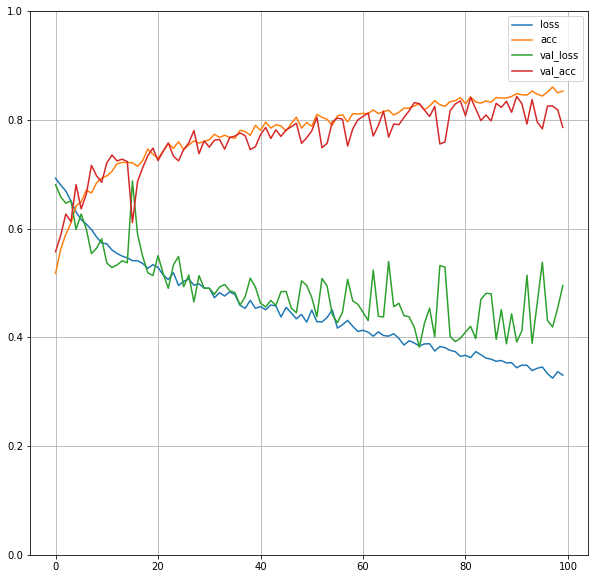

In [15]:
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()